In [355]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline

In [356]:
def IRF(parameter):
    a,b,c=parameter
    return lambda x: c+(1-c)/(1+np.e**(-a*(x-b)))

In [404]:
def finite_difference_IRF(parameter,pivot):
    a,b,c=parameter
    eps=10**-12
    if pivot==0:
        return lambda x: 0.5*(IRF([a+eps,b,c])(x)-IRF([a-eps,b,c])(x))/eps
    if pivot==1:
        return lambda x: 0.5*(IRF([a,b+eps,c])(x)-IRF([a,b-eps,c])(x))/eps
    if pivot==2:
        return lambda x: 0.5*(IRF([a,b,c+eps])(x)-IRF([a,b,c-eps])(x))/eps

In [405]:
def Histogram(scorelist):
    t=set(scorelist)
    print t
    p=[0 for _ in range(max(t)+1)]
    for i in range(len(scorelist)):
        p[scorelist[i]]+=1
    return t,p

In [518]:
Questions = [[1,0,0,0],[1,1,1,1],[1,0,1,0],[1,1,0,0],[1,1,0,0],[1,0,0,0],[1,1,1,0],[1,1,1,0],[0,0,0,0],[0,1,0,0],[1,0,0,0],[1,1,1,0]]
for i in range(len(Questions)):
    Questions[i].append(int(random.randint(0,sum(Questions[i]))>0))
for i in range(len(Questions)):
    Questions[i].append(int(random.randint(0,sum(Questions[i]))>1))
for i in range(len(Questions)):
    Questions[i].append(int(random.randint(0,sum(Questions[i]))>2))
for i in range(len(Questions)):
    Questions[i].append(int(random.randint(0,sum(Questions[i]))>3))

In [519]:
print Questions

[[1, 0, 0, 0, 1, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 0], [1, 0, 1, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0]]


[2, 6, 6, 5, 2, 1, 4, 6, 0, 1, 1, 4]
set([0, 1, 2, 4, 5, 6])


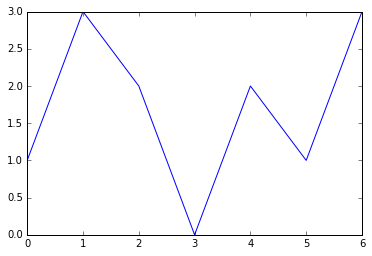

In [520]:
print [sum(i) for i in Questions]
plt.plot(Histogram([sum(i) for i in Questions])[1])

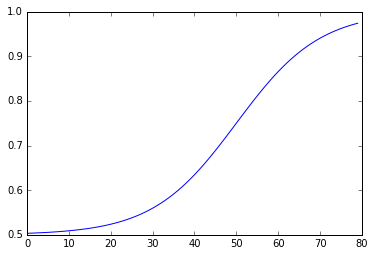

In [521]:
X=[i/10.0 for i in range(-40,40)]
plt.plot(list(map(lambda x: IRF([1,1,0.5])(x) , X)))

In [522]:
no_questions=len(zip(*Questions))

In [523]:
Parameters = [[2,2,1] for i in range(no_questions)]

In [524]:
print Parameters
mu=0.5

[[2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1]]


In [525]:
def CalculateError(Questions,Parameters,show_plot=False):
    theta_list = [sum(i) for i in Questions]
    responses = zip(*Questions)
    for index_item in range(len(responses)):
        
        if show_plot:
            plt.plot([i/5.0 for i in range(0,26)],[IRF(Parameters[index_item])(i/5.0) for i in range(0,26)])
        
        Error_List = [(IRF(Parameters[index_item])(theta_list[i]) - responses[index_item][i])**2 for i in range(len(zip(*responses)))]
        dError_List = [[IRF(Parameters[index_item])(theta_list[i]) - responses[index_item][i]] for i in range(len(zip(*responses)))]
        
        if show_plot:
            print sum(Error_List)
        
        Gradients=[[finite_difference_IRF(Parameters[index_item],i)(theta_list[j]) for i in range(3)] for j in range(len(theta_list))]
        
        error_derivatives = np.multiply(dError_List,Gradients)
        
        learning = [-mu * sum(zip(*error_derivatives)[i]) for i in range(len(zip(*error_derivatives)))]
        Parameters[index_item]=np.add(Parameters[index_item],learning)
        
        
        Parameters[index_item][2]=max(Parameters[index_item][2],0)
        Parameters[index_item][2]=min(Parameters[index_item][2],1)
        
    plt.show()

2.0
5.0
7.0
11.0
6.0
9.0
8.0
10.0


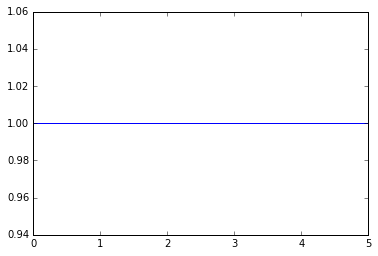

0.670322902441
2.18381406645
1.00348369083
0.669768906271
1.50373802547
1.05045212214
0.015621637208
1.27460278235


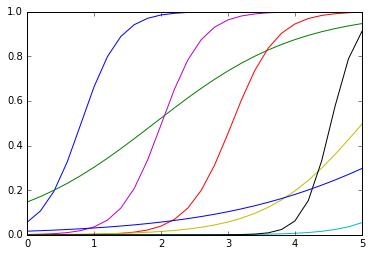

In [526]:
initial=0.8
final=0.02
end=8000
for itera in range(end):
    mu=(initial-final)*np.e**-itera + final
    CalculateError(Questions,Parameters,itera%(end-1)==0)

In [527]:
print '\n'.join(map(str,Parameters))

[ 3.49800015  0.80659156  0.        ]
[ 0.9258114  1.9022264  0.       ]
[ 3.02204174  3.06115777  0.        ]
[ 2.14343183  6.33328384  0.        ]
[ 3.27921435  2.00896477  0.        ]
[ 1.39133969  5.01224462  0.        ]
[ 5.04187427  4.53881357  0.        ]
[ 0.64842697  6.32970458  0.        ]
